In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# (EDA) with Multiple Datasets for Loan Utilization and Drawdown Rate Correlation

Exploratory Data Analysis (EDA) is an essential step in data preprocessing and feature understanding before constructing predictive models.

In the context of loan utilization and drawdown rate prediction, utilizing multiple datasets can yield valuable insights into the underlying relationships between features and outcomes. Here, we discuss how EDA conducted on three distinct datasets — a small one with 340 features, a medium-sized dataset with 534 features, and the original application dataset featuring 126 features — can help unveil correlated features for predicting loan utilization and drawdown rates.

By conducting EDA across these three datasets, we open avenues for identifying features that correlate with loan utilization and drawdown rates. The supplementary datasets contribute information about previous loans and their monthly balances, enriching the dataset with a broader context.

# Calling Datasets

In [ ]:
#Small Datasets
train_small = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_small.csv')
test_small = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_small.csv')

#Model Dataset
train_medium = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_medium.csv')
test_medium = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_medium.csv')

#Unadulterated Dataset
application_train = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_application.csv')
application_test = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_application.csv')

# Plotting

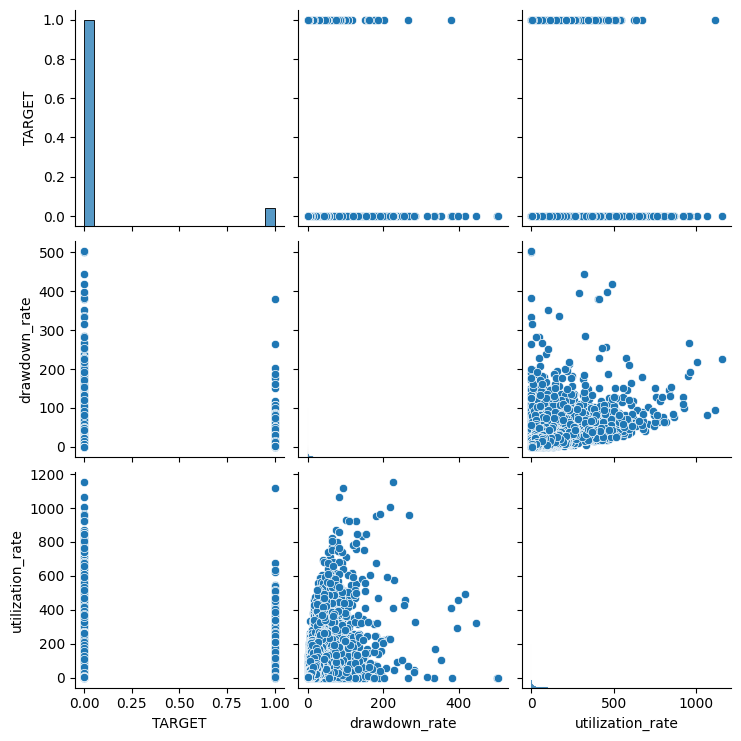

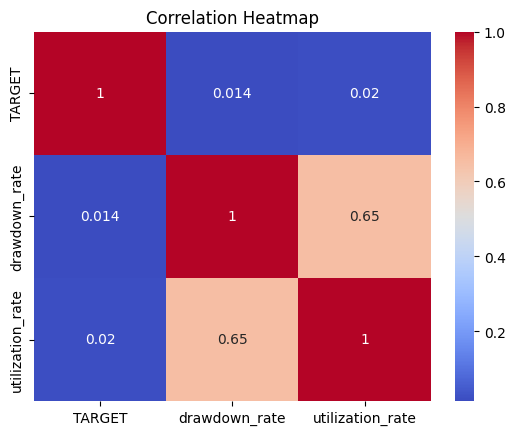

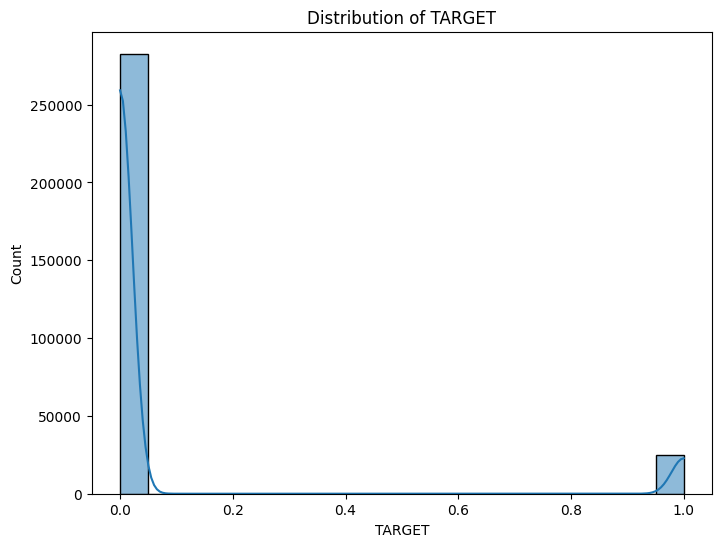

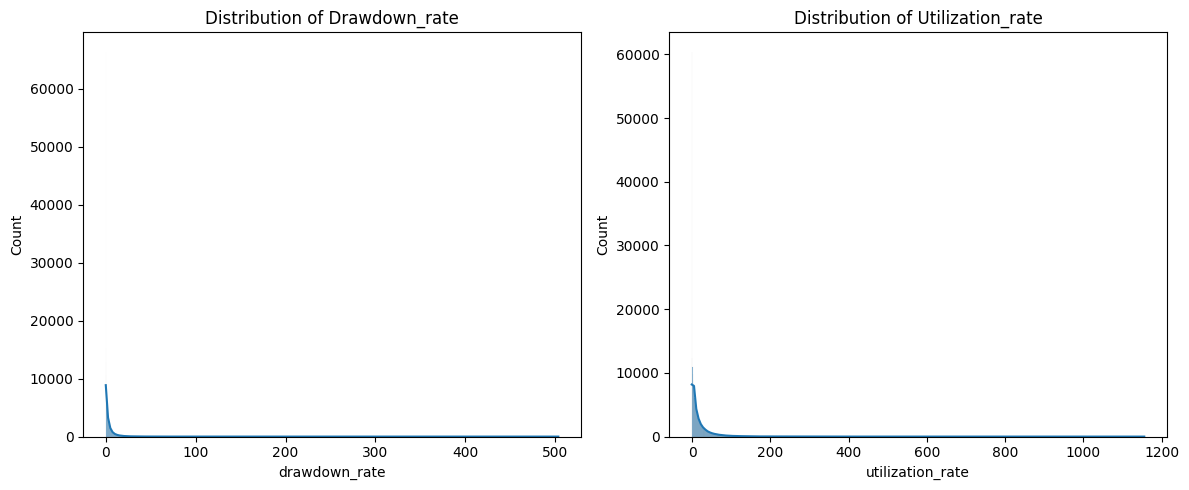

In [ ]:
# Explore relationships between variables using pairplot

train_plot=train_small
train_plot['drawdown_rate']=train_plot['drawdown_rate']*100
train_plot['utilization_rate']=train_plot['utilization_rate']*100

sns.pairplot(train_plot[['TARGET', 'drawdown_rate', 'utilization_rate']])
plt.show()

# Plot correlation heatmap
correlation_matrix = train_plot[['TARGET', 'drawdown_rate', 'utilization_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Explore distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=train_plot, x='TARGET', kde=True)
plt.title('Distribution of TARGET')
plt.show()

# Explore distribution of Drawdown_rate and Utilization_rate
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train_plot, x='drawdown_rate', kde=True)
plt.title('Distribution of Drawdown_rate')

plt.subplot(1, 2, 2)
sns.histplot(data=train_plot, x='utilization_rate', kde=True)
plt.title('Distribution of Utilization_rate')

plt.tight_layout()
plt.show()

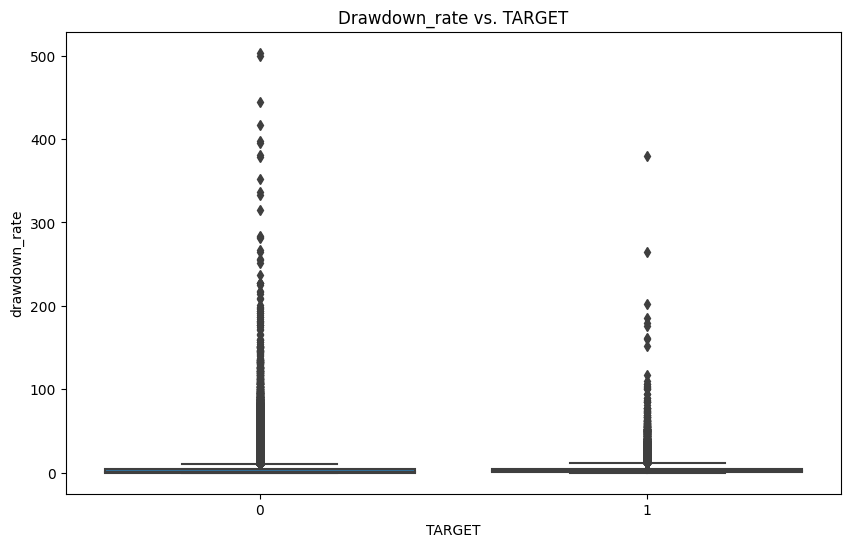

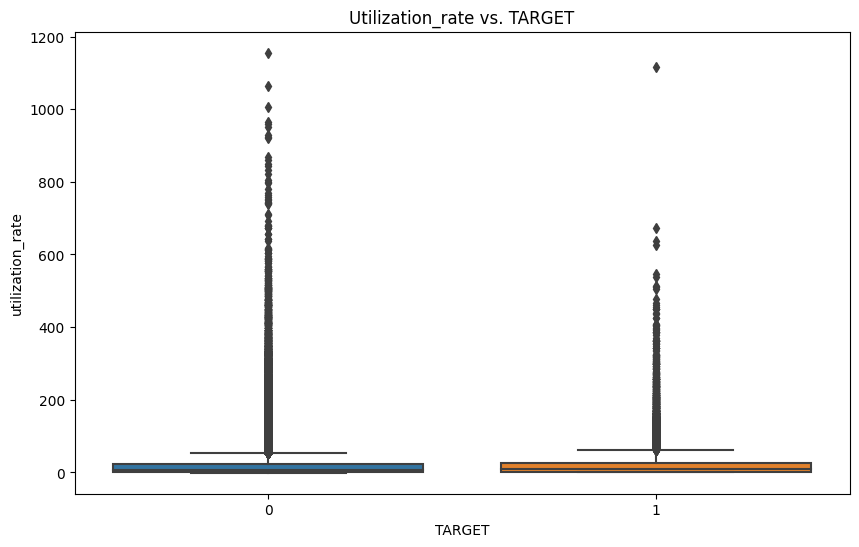

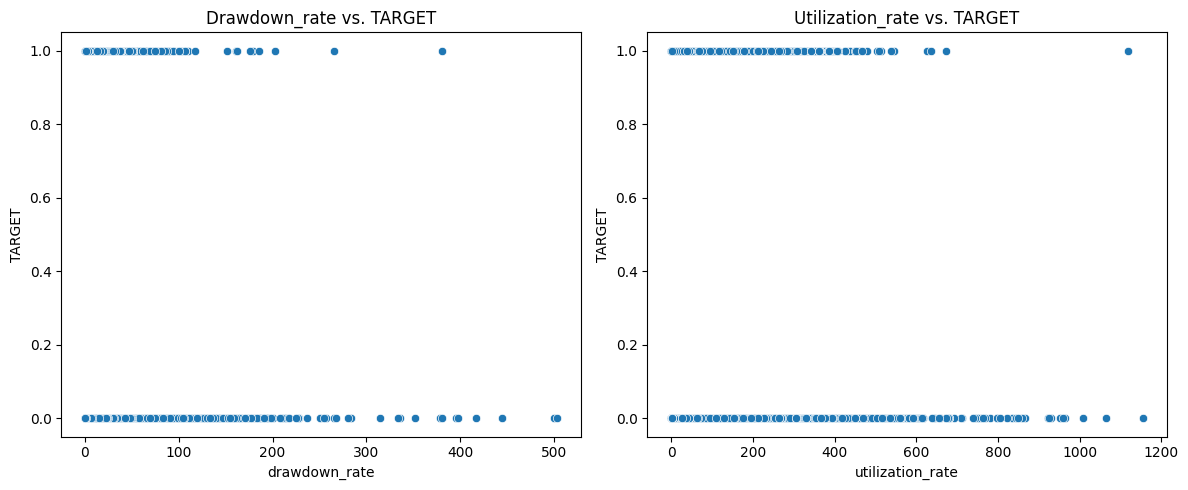

TARGET                                                     1.000000
client_credit_CNT_DRAWINGS_CURRENT_max_max                 0.101389
bureau_DAYS_CREDIT_mean                                    0.089729
client_credit_AMT_RECIVABLE_mean_min                       0.086289
DAYS_BIRTH                                                 0.078239
                                                             ...   
client_bureau_balance_STATUS_C_count_mean                 -0.062954
previous_loans_NAME_CONTRACT_STATUS_Approved_count_norm   -0.063521
EXT_SOURCE_1                                              -0.155317
EXT_SOURCE_2                                              -0.160472
EXT_SOURCE_3                                              -0.178919
Name: TARGET, Length: 340, dtype: float64


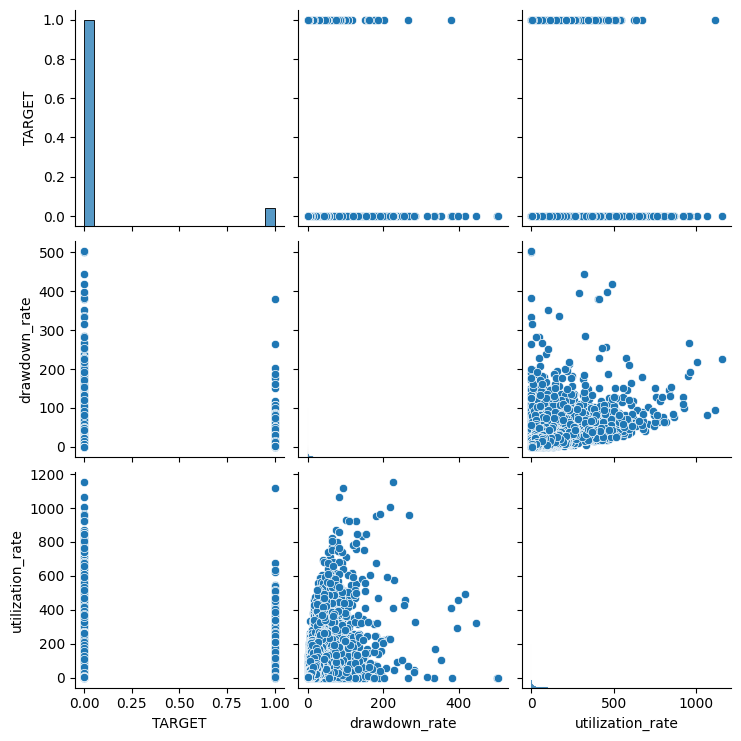

In [ ]:
# Box plot to visualize the distribution of the target variable for different categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_plot, x='TARGET', y='drawdown_rate')
plt.title('Drawdown_rate vs. TARGET')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_plot, x='TARGET', y='utilization_rate')
plt.title('Utilization_rate vs. TARGET')
plt.show()

# Scatter plots to visualize correlations between features and the target
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_plot, x='drawdown_rate', y='TARGET')
plt.title('Drawdown_rate vs. TARGET')

plt.subplot(1, 2, 2)
sns.scatterplot(data=train_plot, x='utilization_rate', y='TARGET')
plt.title('Utilization_rate vs. TARGET')

plt.tight_layout()
plt.show()

# Identify highest correlations with the target
correlation_with_target = train_plot.corr()['TARGET'].sort_values(ascending=False)
print(correlation_with_target)

# Pairplot focusing on highest correlated features
high_corr_features = ['TARGET', 'drawdown_rate', 'utilization_rate']
sns.pairplot(train_plot[high_corr_features])
plt.show()

# Finding most powerful correlations

In [ ]:
# Find correlations with the target and sort
application_train_corr=application_train
application_train_corr['drawdown_rate']=application_train_corr['drawdown_rate']*100
application_train_corr['utilization_rate']=application_train_corr['utilization_rate']*100
correlations = application_train_corr.corr()['drawdown_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 REG_CITY_NOT_LIVE_CITY                          0.011369
FLAG_DOCUMENT_5                                 0.011562
TARGET                                          0.013981
DAYS_EMPLOYED                                   0.017778
AMT_REQ_CREDIT_BUREAU_YEAR                      0.018071
OWN_CAR_AGE                                     0.020258
FLAG_WORK_PHONE                                 0.020698
REGION_RATING_CLIENT                            0.022208
REGION_RATING_CLIENT_W_CITY                     0.025623
DAYS_BIRTH                                      0.025910
DAYS_LAST_PHONE_CHANGE                          0.036018
client_credit_AMT_BALANCE_mean_mean             0.408726
utilization_rate                                0.653331
client_credit_AMT_DRAWINGS_CURRENT_mean_mean    0.685534
drawdown_rate                                   1.000000
Name: drawdown_rate, dtype: float64

Most Negative Correlations:
 AMT_CREDIT                   -0.261270
AMT_GOODS_P

In [ ]:
# Find correlations with the target and sort
train_small_corr=train_small
train_small_corr['drawdown_rate']=train_small_corr['drawdown_rate']*100
train_small_corr['utilization_rate']=train_small_corr['utilization_rate']*100
correlations = train_small_corr.corr()['drawdown_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_BALANCE_min_max                  0.218591
client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_min      0.284636
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum    0.286817
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.292132
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_sum    0.345085
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_max    0.360273
client_credit_CNT_DRAWINGS_CURRENT_max_max         0.372683
client_credit_AMT_BALANCE_mean_mean                0.408726
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.414536
client_credit_AMT_RECIVABLE_mean_min               0.432701
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.471410
utilization_rate                                   0.653331
client_credit_AMT_DRAWINGS_CURRENT_mean_max        0.684979
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.685534
drawdown_rate                                      1.000000
Name: drawdown_rate, dtype: float64

Most Negative Correlations:
 AMT_C

In [ ]:
# Find correlations with the target and sort
train_medium_corr=train_medium
train_medium_corr['drawdown_rate']=train_medium_corr['drawdown_rate']*100
train_medium_corr['utilization_rate']=train_medium_corr['utilization_rate']*100
correlations = train_medium_corr.corr()['drawdown_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.292132
client_credit_CNT_DRAWINGS_POS_CURRENT_sum_min     0.299195
client_credit_AMT_DRAWINGS_CURRENT_min_max         0.334796
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_sum    0.345085
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_max    0.360273
client_credit_CNT_DRAWINGS_CURRENT_max_max         0.372683
client_credit_AMT_BALANCE_mean_mean                0.408726
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.414536
client_credit_AMT_RECIVABLE_mean_min               0.432701
client_credit_AMT_DRAWINGS_CURRENT_mean_sum        0.441493
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.471410
utilization_rate                                   0.653331
client_credit_AMT_DRAWINGS_CURRENT_mean_max        0.684979
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.685534
drawdown_rate                                      1.000000
Name: drawdown_rate, dtype: float64

Most Negative Correlations:
 AMT_C

In [ ]:
# Find correlations with the target and sort
correlations = application_train_corr.corr()['utilization_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_DOCUMENT_5                                 0.010581
REG_CITY_NOT_LIVE_CITY                          0.010835
DAYS_EMPLOYED                                   0.019831
TARGET                                          0.020129
FLAG_WORK_PHONE                                 0.021043
REGION_RATING_CLIENT                            0.025117
DAYS_BIRTH                                      0.025182
AMT_REQ_CREDIT_BUREAU_YEAR                      0.025591
DAYS_LAST_PHONE_CHANGE                          0.026457
REGION_RATING_CLIENT_W_CITY                     0.028782
OWN_CAR_AGE                                     0.033112
client_credit_AMT_DRAWINGS_CURRENT_mean_mean    0.376970
drawdown_rate                                   0.653331
client_credit_AMT_BALANCE_mean_mean             0.676119
utilization_rate                                1.000000
Name: utilization_rate, dtype: float64

Most Negative Correlations:
 AMT_CREDIT                   -0.309266
AMT_GOOD

In [ ]:
# Find correlations with the target and sort
correlations = train_small_corr.corr()['utilization_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_BALANCE_min_sum                  0.300319
client_credit_CNT_DRAWINGS_ATM_CURRENT_sum_mean    0.316975
client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_min      0.335953
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum    0.343531
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.352628
client_credit_AMT_DRAWINGS_CURRENT_mean_max        0.361978
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.376970
client_credit_AMT_BALANCE_min_max                  0.386263
client_credit_AMT_TOTAL_RECEIVABLE_sum_min         0.447287
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.453784
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.586211
drawdown_rate                                      0.653331
client_credit_AMT_BALANCE_mean_mean                0.676119
client_credit_AMT_RECIVABLE_mean_min               0.701753
utilization_rate                                   1.000000
Name: utilization_rate, dtype: float64

Most Negative Correlations:
 AM

In [ ]:
# Find correlations with the target and sort
correlations = train_medium_corr.corr()['utilization_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_CNT_DRAWINGS_ATM_CURRENT_sum_mean    0.316975
client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_min      0.335953
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum    0.343531
client_credit_AMT_DRAWINGS_CURRENT_mean_sum        0.349030
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.352628
client_credit_AMT_DRAWINGS_CURRENT_mean_max        0.361978
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.376970
client_credit_AMT_BALANCE_min_max                  0.386263
client_credit_AMT_TOTAL_RECEIVABLE_sum_min         0.447287
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.453784
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.586211
drawdown_rate                                      0.653331
client_credit_AMT_BALANCE_mean_mean                0.676119
client_credit_AMT_RECIVABLE_mean_min               0.701753
utilization_rate                                   1.000000
Name: utilization_rate, dtype: float64

Most Negative Correlations:
 AM

# Exterior Sources

In [ ]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


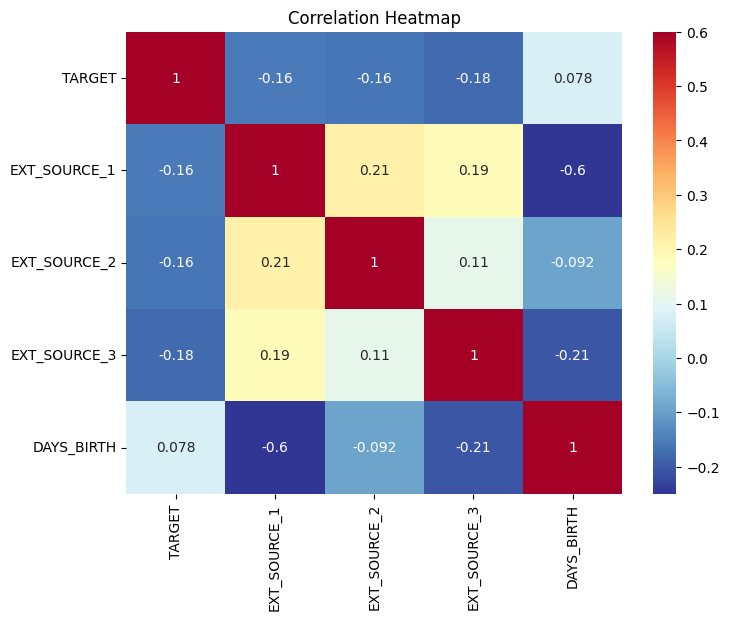

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Visualizing plots

In [ ]:
app_train_domain = application_train.copy()
app_test_domain = application_test.copy()

In [ ]:
app_train_domain['utilization_rate']=app_train_domain['utilization_rate']*100
app_train_domain['drawdown_rate']=app_train_domain['drawdown_rate']*100

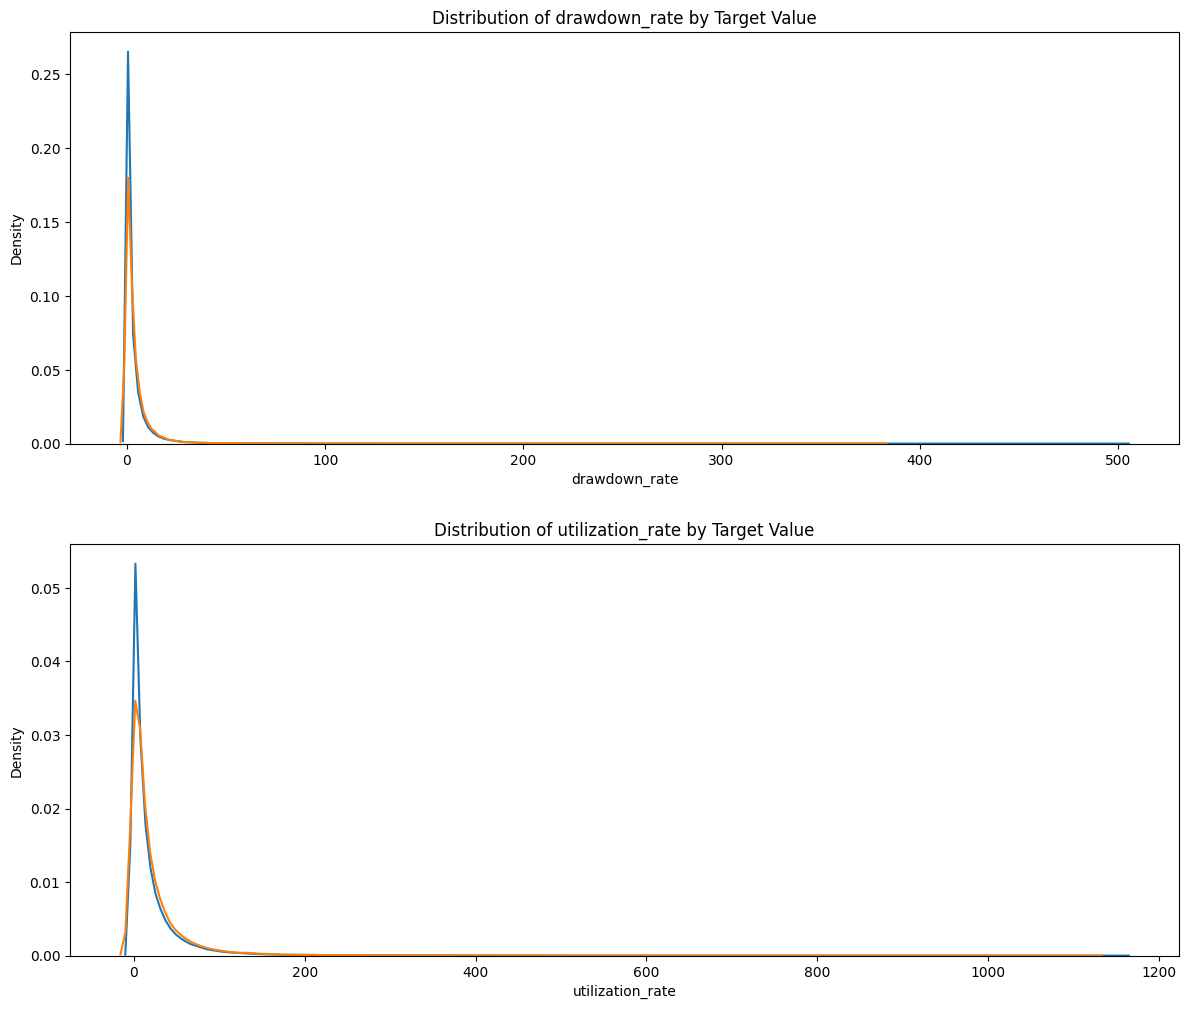

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['drawdown_rate', 'utilization_rate']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)